# Load Packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns
import string
import tweepy as tw

# nltk packages
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

# Sklearn packages
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits

from google.colab import drive
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

## Extract Twitter Data using Tweepy API

In [ ]:
'''
#Instantiate tweepy API --- API keys have been removed 
consumer_key= 'TKlbEydyWnvDXXXXXXXXX'
consumer_secret= 'AsmEHtBqdsOw3vWXiqfXXXXXXXXX'
access_token= '44821419-FvKUyjDgtQA2KzWNqjhzXXXXXXXXXXX'
access_token_secret= 'Bdj79RfElHp5CQm3CirblXXXXXXXXXXXXXXXX'

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

# Define the search term and the date_since date as variables
search_words = "#news"
'''

'\n#Instantiate tweepy API --- API keys have been removed \nconsumer_key= \'TKlbEydyWnvDXXXXXXXXX\'\nconsumer_secret= \'AsmEHtBqdsOw3vWXiqfXXXXXXXXX\'\naccess_token= \'44821419-FvKUyjDgtQA2KzWNqjhzXXXXXXXXXXX\'\naccess_token_secret= \'Bdj79RfElHp5CQm3CirblXXXXXXXXXXXXXXXX\'\n\nauth = tw.OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_token_secret)\napi = tw.API(auth, wait_on_rate_limit=True)\n\n# Define the search term and the date_since date as variables\nsearch_words = "#news"\n'

In [ ]:
''''
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              tweet_mode = "extended",  
              include_rts=False,).items(3000) 

In [ ]:
''''
#save tweets
searched_tweets = [status._json for status in tweets]
json_strings = [json.dumps(json_obj) for json_obj in searched_tweets]  


In [ ]:
''''
# Write to json file
with open("news.json", "w", encoding='utf8') as f: 
    f.write('[')
    for i,x in enumerate(json_strings):
        f.write(x)
        if i != len(json_strings) - 1:
            f.write(",")
        
    f.write(']')

In [ ]:

# Open json file 'read'
#with open('news.json', 'r') as tweetfile:
 # newstweets = json.loads(tweetfile.read())

In [ ]:
# Save tweets into pd dataframe
#news_tweets = pd.read_json('news.json')
#print(news_tweets.head())

In [ ]:
# Save to csv file to distribute to the rest of the groupmembers
#news_tweets.to_csv('news_tweet.csv', index = False)


In [1]:
from google.colab import files
uploaded = files.upload()

Saving news_tweets.csv to news_tweets.csv
Saving reddit_comments_sample.csv to reddit_comments_sample.csv
Saving sarcasm.csv to sarcasm.csv
Saving sarcastic_tweets.csv to sarcastic_tweets.csv


# Read Files

In [48]:
# Read in files
#file_path = "/content/sample_data/"
reddit_comments_file = "reddit_comments_sample.csv"
sarcastic_twitter_api_file = "sarcastic_tweets.csv"
news_twitter_file = "news_tweets.csv"
sarcastic_twitter_narcis_file = "sarcasm.csv"

In [49]:
# Load Reddit Comments
reddit_comments = pd.read_csv(reddit_comments_file).sample(2000, random_state=50)
reddit_comments.head(5)

,Unnamed: 0,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
565,417747,0,Jet fuel can't melt wood beems.,thekidslaughter,AskReddit,2,2,0,2016-02,2016-02-16 16:44:37,Wood as a structural building material. It bur...
1223,840209,1,Rex Ryan is guru for young QBs,tootie,nfl,0,0,0,2014-12,2014-12-29 21:11:01,"Is Oakland all that far from being decent, tho..."
1581,592204,1,So it is pretty bad ;p,LaGGwagen,ShitWehraboosSay,1,1,0,2015-12,2015-12-29 01:17:31,It's flight performance is that of an F-35 unt...
959,740100,1,body positivity cmon guys shes so beautiful ri...,batfolx,FiftyFifty,2,2,0,2015-05,2015-05-30 14:28:24,Rosie Macc stunt double for Emlia Clarke AKA D...
1974,605110,1,Does he have cold hands and a distended gut?,FlameSpartan,fatlogic,1,1,0,2015-07,2015-07-15 19:21:39,Lol. My friends on the warrior diet and eats s...


In [50]:
# Load Sarcastic Tweets
sarcastic_tweets = pd.read_csv(sarcastic_twitter_api_file).sample(1000, random_state=60)
sarcastic_tweets['label'] = 1 
sarcastic_tweets.head(5)

,created_at,id_str,full_text,truncated,display_text_range,entities,metadata,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,label
2787,2020-11-17 20:55:31+00:00,1.328800e+18,LMFAO 2600 uncounted votes found!!! 800 go to ...,False,"[0, 228]","{'hashtags': [{'text': 'SnortLaugh', 'indices'...","{'iso_language_code': 'en', 'result_type': 're...",NaN,NaN,NaN,NaN,NaN,"{'id': 1038464880888573952, 'id_str': '1038464...",NaN,NaN,NaN,False,0,1,False,False,en,1
2798,2020-11-17 20:15:56+00:00,1.328790e+18,The Upside of COVID......#silverlinings #sarca...,False,"[0, 48]","{'hashtags': [{'text': 'silverlinings', 'indic...","{'iso_language_code': 'en', 'result_type': 're...",NaN,NaN,NaN,NaN,NaN,"{'id': 130680831, 'id_str': '130680831', 'name...",NaN,NaN,NaN,True,1,1,False,False,en,1
2527,2020-11-18 14:58:42+00:00,1.329080e+18,"🎧 4 yr likes, 4 yr likes, \ni'd steal 10,000 b...",False,"[0, 61]","{'hashtags': [{'text': 'Sarcasm', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...",NaN,NaN,NaN,NaN,NaN,"{'id': 407759517, 'id_str': '407759517', 'name...",NaN,NaN,NaN,False,0,2,False,False,en,1
1499,2020-11-21 23:33:30+00:00,1.330290e+18,"Michigan #gop leaders stay at Trump hotel, mee...",False,"[0, 167]","{'hashtags': [{'text': 'gop', 'indices': [9, 1...","{'iso_language_code': 'en', 'result_type': 're...",NaN,NaN,NaN,NaN,NaN,"{'id': 17217175, 'id_str': '17217175', 'name':...",NaN,NaN,NaN,False,0,0,False,False,en,1
1689,2020-11-21 11:03:45+00:00,1.330100e+18,Some of you are just accidents; not planned.\n...,False,"[0, 98]","{'hashtags': [{'text': 'life', 'indices': [84,...","{'iso_language_code': 'en', 'result_type': 're...",NaN,NaN,NaN,NaN,NaN,"{'id': 1107988407781916672, 'id_str': '1107988...",NaN,NaN,NaN,False,0,4,False,False,en,1


In [51]:
# # Load News Tweets
news_tweets  = pd.read_csv(news_twitter_file).sample(1000, random_state=70)
news_tweets['label'] = 0
news_tweets.head(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,label
525,2020-12-09 14:14:37+00:00,1.336680e+18,1.336680e+18,Joe Biden Faces Blowback on DoD Pick: ‘Possibl...,False,"[0, 159]","{'hashtags': [{'text': 'RicoTheDems', 'indices...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,NaN,"{'id': 199374188, 'id_str': '199374188', 'name...",NaN,NaN,NaN,NaN,False,1,0
1214,2020-12-09 13:08:20+00:00,1.336660e+18,1.336660e+18,RT @AndrewRosSorkin: $CTRM ⛴⚓️🚢🌏🛳🐬 🌊🚢⛽️\n\nPAN...,False,"[0, 140]","{'hashtags': [{'text': 'DryBulk', 'indices': [...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,NaN,"{'id': 2848942445, 'id_str': '2848942445', 'na...",NaN,NaN,NaN,NaN,False,2,0
658,2020-12-09 14:04:06+00:00,1.336670e+18,1.336670e+18,"On encryption and counter-terrorism, EU lawmak...",False,"[0, 147]","{'hashtags': [{'text': 'news', 'indices': [133...","{'media': [{'id': 1336672975140098055, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twibble.io"" rel=""nofollow"">Twi...",NaN,NaN,NaN,NaN,NaN,"{'id': 2263797415, 'id_str': '2263797415', 'na...",NaN,NaN,NaN,NaN,False,0,0
304,2020-12-09 14:33:34+00:00,1.336680e+18,1.336680e+18,"Edo State Governor, Godwin Obaseki, yesterday,...",False,"[0, 150]","{'hashtags': [{'text': 'News', 'indices': [145...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",NaN,NaN,NaN,NaN,NaN,"{'id': 863764303991713792, 'id_str': '86376430...",NaN,NaN,NaN,NaN,False,0,0
1529,2020-12-09 12:30:03+00:00,1.336650e+18,1.336650e+18,Malaga Local Police release Christmas video ht...,False,"[0, 122]",{'hashtags': [{'text': 'AxarquíaCostaTropical'...,NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",NaN,NaN,NaN,NaN,NaN,"{'id': 110434540, 'id_str': '110434540', 'name...",NaN,NaN,NaN,NaN,False,1,0


In [52]:
# Load Narcis Tweets
narcis_tweets  = pd.read_csv(sarcastic_twitter_narcis_file).sample(1000, random_state=80)
narcis_tweets.head(5)

,Tweet,Reverse,label
1402,oh i just love getting hit on by creeps at terms,terms at creeps by on hit getting love just i oh,1
1098,i love being lied to on a daily basis,basis daily a on to lied being love i,1
1068,gotta love getting lied to #thebest,#thebest to lied getting love gotta,1
1063,holy crap ya'll i love being ignored :d,:d ignored being love i ya'll crap holy,1
286,cant wait to go driving tonight with USER -_- ...,#scared -_- USER with tonight driving go to wa...,0


# Merge and Clean Files

In [53]:
# Merge sarcastic and non-sarcastic twitter files
twitter_df = pd.concat([sarcastic_tweets, news_tweets])
twitter_df.head(5)

,created_at,id_str,full_text,truncated,display_text_range,entities,metadata,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,label,id,extended_entities,source,contributors
2787,2020-11-17 20:55:31+00:00,1.328800e+18,LMFAO 2600 uncounted votes found!!! 800 go to ...,False,"[0, 228]","{'hashtags': [{'text': 'SnortLaugh', 'indices'...","{'iso_language_code': 'en', 'result_type': 're...",NaN,NaN,NaN,NaN,NaN,"{'id': 1038464880888573952, 'id_str': '1038464...",NaN,NaN,NaN,False,0,1.0,False,False,en,1,NaN,NaN,NaN,NaN
2798,2020-11-17 20:15:56+00:00,1.328790e+18,The Upside of COVID......#silverlinings #sarca...,False,"[0, 48]","{'hashtags': [{'text': 'silverlinings', 'indic...","{'iso_language_code': 'en', 'result_type': 're...",NaN,NaN,NaN,NaN,NaN,"{'id': 130680831, 'id_str': '130680831', 'name...",NaN,NaN,NaN,True,1,1.0,False,False,en,1,NaN,NaN,NaN,NaN
2527,2020-11-18 14:58:42+00:00,1.329080e+18,"🎧 4 yr likes, 4 yr likes, \ni'd steal 10,000 b...",False,"[0, 61]","{'hashtags': [{'text': 'Sarcasm', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...",NaN,NaN,NaN,NaN,NaN,"{'id': 407759517, 'id_str': '407759517', 'name...",NaN,NaN,NaN,False,0,2.0,False,False,en,1,NaN,NaN,NaN,NaN
1499,2020-11-21 23:33:30+00:00,1.330290e+18,"Michigan #gop leaders stay at Trump hotel, mee...",False,"[0, 167]","{'hashtags': [{'text': 'gop', 'indices': [9, 1...","{'iso_language_code': 'en', 'result_type': 're...",NaN,NaN,NaN,NaN,NaN,"{'id': 17217175, 'id_str': '17217175', 'name':...",NaN,NaN,NaN,False,0,0.0,False,False,en,1,NaN,NaN,NaN,NaN
1689,2020-11-21 11:03:45+00:00,1.330100e+18,Some of you are just accidents; not planned.\n...,False,"[0, 98]","{'hashtags': [{'text': 'life', 'indices': [84,...","{'iso_language_code': 'en', 'result_type': 're...",NaN,NaN,NaN,NaN,NaN,"{'id': 1107988407781916672, 'id_str': '1107988...",NaN,NaN,NaN,False,0,4.0,False,False,en,1,NaN,NaN,NaN,NaN


In [54]:
def clean_text(txt):
    '''
    Function to clean text
    '''
    txt = re.sub(r'[,.;@#?!&$\-\']+', '', txt, flags=re.IGNORECASE)    # Replace punctuation with space
    txt = re.sub(r'\ +', ' ', txt, flags=re.IGNORECASE)                # Accept one or more copies of punctuation
    txt = re.sub(r'\"', ' ', txt, flags=re.IGNORECASE)                 # Replace quote mark with space
    txt = re.sub(r'\\n', ' ', txt, flags=re.IGNORECASE)                # Replace end line with space
    txt = re.sub(r'[^a-zA-Z]', ' ', txt, flags=re.VERBOSE)             # Replace any character that isn't a letter
    txt = re.sub(r'\b\w{1,1}\b', '', txt, flags=re.VERBOSE)            # Removes all words less than 1 letters
    txt = re.sub(r'#sarcasm', '', txt, flags=re.VERBOSE)               # Removes all sarcasm hashtags
    txt = re.sub(r'sarcasm', '', txt, flags=re.IGNORECASE)             # Removes all sarcasm words
    txt = re.sub(r'#news', '', txt, flags=re.VERBOSE)                  # Removes all news hashtags
    txt = re.sub(r'news', '', txt, flags=re.IGNORECASE)                # Removes all news words
    txt = re.sub(r'https', '', txt, flags=re.IGNORECASE)               # Removes httlps words
    txt = re.sub(r'tco', '', txt, flags=re.IGNORECASE)  
    txt = re.sub(r'rt', '', txt, flags=re.IGNORECASE)  
    txt = re.sub(r'USER', '', txt, flags=re.IGNORECASE)
    txt = txt.lstrip()
    txt = txt.rstrip()
    txt = txt.strip("\\n")
    txt = re.sub(r'URL', '', txt, flags=re.IGNORECASE)
                   
    return txt

In [55]:
def convert_to_list(df, col, l):
    '''
    Function to convert column to list
    '''
    # Iterate through data frame
    for row in df[col]:
        if col != 'label':
            # Convert row to string
            row = str(row)
            row = clean_text(row) 
        
        # Append row to list
        l.append(row)
        
    return l

In [56]:
text = []
labels = []

# Get twitter api lists
text = convert_to_list(twitter_df, 'full_text', text) 
labels = convert_to_list(twitter_df, 'label', labels) 

# Get arcis twitter lists
text = convert_to_list(narcis_tweets, 'Tweet', text) 
labels = convert_to_list(narcis_tweets, 'label', labels) 

# Get Reddit comments lists
text = convert_to_list(reddit_comments, 'comment', text) 
labels = convert_to_list(reddit_comments, 'label', labels) 

# Print length of lists
print(len(text))
print(len(labels))

# Show text
text[:10]

5000
5000


['LMFAO      uncounted votes found     go to Trump That  it Trump won JoeBiden amp KamalaHarris need to quit their jobs now SnoLaugh  Resistance',
 'The Upside of COVIDsilverlinings      gWkfhcQ MI',
 'yr likes   yr likes  id steal       bikes',
 'Michigan gop leaders stay at Trump hotel meet with realDonaldTrump and then mysteriously want to void all votes by democrats No corruption suspected  mia',
 'Some of you are just accidents not planned Dont take your life so seriously     life',
 'pinoyanghang  WORD OF THE DAY   Campa anita    pomanteau of the words  campa   and  ma anita        hg czZK',
 'Keith Starmer  decision not to restore the whip to jeremycorbyn is  petty move  look forward to seeing action from the socialistcam in suppo of JC  Time will tell Either way Starmer  idea of Unity is  joke Solidarity  What Solidarity',
 'IGNORE  dank twitterpost tweet anime relatable indianmemes funnyvideos instamemes tiktokmemes comedy likeforlikes funnytweets dankmemesdaily animememes fol

In [57]:
# Create a dataframe with text and labels column for some quick EDA 
combined = {'text':text,'labels':labels}
combined_df = pd.DataFrame(combined)
print(combined_df)

                                                   text  labels
0     LMFAO      uncounted votes found     go to Tru...       1
1      The Upside of COVIDsilverlinings      gWkfhcQ MI       1
2             yr likes   yr likes  id steal       bikes       1
3     Michigan gop leaders stay at Trump hotel meet ...       1
4     Some of you are just accidents not planned Don...       1
...                                                 ...     ...
4995                                                          0
4996  Obviously his high IQ burden does not allow hi...       1
4997  Too much navel gazing by the theoretical physi...       0
4998  couple of leaves on my plant are doing that as...       0
4999    know this isnt from experience completely false       0

[5000 rows x 2 columns]


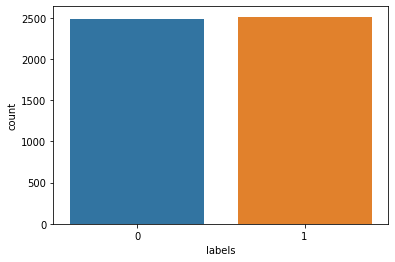

In [ ]:
ax = sns.countplot(x="labels", data=combined_df)

# Instantiate Vectorizer

In [58]:
# Class to Lemmatize words
lemmmatizer = WordNetLemmatizer()

class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

In [59]:
# Instantiate Count Vectorizer
def vectorize(max_ngram, lower):
  cv = CountVectorizer(
          input ='content',                 # Input content
          analyzer = 'word',                # Break up text by words
          stop_words = 'english',           # Remove English stop words
          tokenizer = LemmaTokenizer(),     # Lemmatize words to their base
          strip_accents = 'unicode',        # Remove unicode characters
          ngram_range=(1, max_ngram),       # Divide text into 1-3 word tokens
          max_features=1000,                # Return top words
          lowercase=lower                   # All tokens are lowercase
  )
  return cv

In [60]:
max_ngram = 3
lower = True

# Vectorize text (lowercase, ngram max = 3, news data included)
cv_lower_3_news = vectorize(max_ngram, lower)

# Vectorize text (No lowercase, ngram max = 3, news data included)
lower = False
cv_all_3_news = vectorize(max_ngram, lower)

# Vectorize text (No lowercase, ngram max = 1, news data included)
max_ngram = 1
cv_all_1_news = vectorize(max_ngram, lower)

# Vectorize text (No lowercase, ngram max = 5, news data included)
max_ngram = 5
cv_all_5_news = vectorize(max_ngram, lower)

# Vectorize text (No lowercase, ngram max = 3, news data not included)
cv_all_3_nonews = vectorize(max_ngram, lower)


In [24]:
# We will also use TFID to vectorize our data
TFIDF =TfidfVectorizer(input='content',
                        analyzer = 'word',
                        stop_words='english',
                        tokenizer= LemmaTokenizer(),
                        strip_accents = 'unicode', 
                        lowercase = True,
                        max_features=1000
                        )

# Get Word Frequency Data Frame

In [61]:
def create_df(text, vect):
    '''
    Create document term matrix data frame
    '''
    matrix = vect.fit_transform(text)                       # Apply CountVectorizer to get sparse matrix
    words = vect.get_feature_names()                        # Get vocab or column names
    df = pd.DataFrame(matrix.toarray(), columns = words)    # Convert matrix to a dataframe
    return df 

In [62]:
# Return dataframes for Count Vectorizer
df_lower_3_news = create_df(text, cv_lower_3_news)
df_all_3_news = create_df(text, cv_all_3_news)
df_all_1_news = create_df(text, cv_all_1_news)
df_all_5_news = create_df(text, cv_all_5_news)
df_all_3_nonews = create_df(text, cv_lower_3_news)

# Print cleaned df
df_lower_3_news.head(5)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing

,able,absolutely,absolutely love,access,according,account,action,actually,actually added,actually added net,add,added,added net,added net new,advice,age,ago,ai,ai researcher,ai researcher detection,aicle,allow,amazing,amazon,america,american,amp,amp teacher,amp teacher home,anime,anita,anita pomanteau,anita pomanteau word,app,apparently,apple,arent,ask,asked,asshole,...,wit say really,woh,woken,woman,won,wonder,wont,word,word campa,word campa ma,word day,word day campa,work,working,world,worry,wouldn,wouldnt,wow,write,write escape,write escape british,wrong,xbox,ya,yall,yay,yeah,year,yes,yh,yh gofr,young,youre,youtube,yugioh,yup,zzfauvimfk,zzfauvimfk stayhome,zzfauvimfk stayhome read
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
# TFIDF data
df2 = create_df(text, TFIDF)

# Print cleaned df
df2.head(5)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,able,absolutely,access,according,account,accused,act,action,actual,actually,add,added,advantage,advice,aeat,ago,agree,ah,ai,allow,allowed,amazing,amazon,america,american,amp,anita,app,apparently,apple,apps,arent,argument,art,article,artificialintelligence,asian,ask,asked,asking,...,woman,won,wonder,wont,word,work,worked,worker,working,world,worry,worse,worship,worst,worth,wouldn,wouldnt,wow,write,wrong,wtf,xbox,ya,yall,yay,yea,yeah,year,yelled,yep,yes,youd,youll,youre,youtube,yup,zero,zu,zy,zzfauvimfk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.297235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.364247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Training and Testing

In [63]:
# Insert labels into data frame and get X, y values
X_lower_3_news = df_lower_3_news.copy() 
df_lower_3_news['label'] = labels
y_lower_3_news = df_lower_3_news['label']

X_all_3_news = df_all_3_news.copy() 
df_all_3_news['label'] = labels
y_all_3_news = df_all_3_news['label']

X_all_1_news = df_all_1_news.copy() 
df_all_1_news['label'] = labels
y_all_1_news = df_all_1_news['label']

X_all_5_news = df_all_5_news.copy() 
df_all_5_news['label'] = labels
y_all_5_news = df_all_5_news['label']

X_all_3_nonews = df_all_3_nonews.copy() 
df_all_3_nonews['label'] = labels
y_all_3_nonews = df_all_3_nonews['label']

In [64]:
# Divide into training and testing
X_train_lower_3_news, X_test_lower_3_news, y_train_lower_3_news, y_test_lower_3_news = train_test_split(X_lower_3_news, y_lower_3_news, test_size=0.3)
X_train_all_3_news, X_test_all_3_news, y_train_all_3_news, y_test_all_3_news = train_test_split(X_all_3_news, y_all_3_news, test_size=0.3)
X_train_all_1_news, X_test_all_1_news, y_train_all_1_news, y_test_all_1_news = train_test_split(X_all_1_news, y_all_1_news, test_size=0.3)
X_train_all_5_news, X_test_all_5_news, y_train_all_5_news, y_test_all_5_news = train_test_split(X_all_5_news, y_all_5_news, test_size=0.3)
X_train_all_3_nonews, X_test_all_3_nonews, y_train_all_3_nonews, y_test_all_3_nonews = train_test_split(X_all_3_nonews, y_all_3_nonews, test_size=0.3)

# Print shape
print(X_train_all_3_news.shape, X_test_all_3_news.shape, y_train_all_3_news.shape, y_test_all_3_news.shape)

(3500, 1000) (1500, 1000) (3500,) (1500,)


In [30]:
# Insert labels into data frame and get X, y values for TFID data
X2 = df2.copy() 
df2['label'] = labels
y2 = df2['label']

In [31]:
# Divide into training and testing
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3)
print(X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape)

(2800, 1000) (1200, 1000) (2800,) (1200,)


# Get Accuracy

In [65]:
def get_accuracy(model, pred, test, X, y):
    '''
    Returns Confusion matrix and accuracy score for validity
    '''
    # Get accuracy score
    score = accuracy_score(test, pred) 
    
    # Get f1 statistic: F1 = 2 * (precision * recall) / (precision + recall)
    f_score = f1_score(test, pred, average='weighted') 
    
    # Create confusion matrix
    cm = confusion_matrix(pred, test) 

    # Create heatmap using Seaborn
    names = np.unique(pred)
    sns.heatmap(cm, 
                square=True,
                xticklabels=names, 
                yticklabels=names)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    
    # Print Scores
    print("Accuracy Score: \n{}\n".format(score))
    print("F1 Score: \n{}\n".format(f_score))
    print("Confusion Matrix: \n{}\n".format(cm))

# Naive Bayes

In [66]:
# Initiate naive Bayes models
nb_lower_3_news = MultinomialNB()
nb_all_3_news = MultinomialNB()
nb_all_1_news = MultinomialNB()
nb_all_5_news = MultinomialNB()
nb_all_3_nonews = MultinomialNB()

# Train naive Bayes models
nb_lower_3_news.fit(X_train_lower_3_news, y_train_lower_3_news)
nb_all_3_news.fit(X_train_all_3_news, y_train_all_3_news)
nb_all_1_news.fit(X_train_all_1_news, y_train_all_1_news)
nb_all_5_news.fit(X_train_all_5_news, y_train_all_5_news)
nb_all_3_nonews.fit(X_train_all_3_nonews, y_train_all_3_nonews)

# Create prediction from
pred_lower_3_news = nb_lower_3_news.predict(X_test_lower_3_news)
pred_all_3_news = nb_all_3_news.predict(X_test_all_3_news)
pred_all_1_news = nb_all_1_news.predict(X_test_all_1_news)
pred_all_5_news = nb_all_5_news.predict(X_test_all_5_news)
pred_all_3_nonews = nb_all_3_nonews.predict(X_test_all_3_nonews)


Naive Bayes Model
(Lowercase | max ngrams = 3 | news dataset included)
----------------------------------------------------

Accuracy Score: 
0.67

F1 Score: 
0.6689651435118924

Confusion Matrix: 
[[458 208]
 [287 547]]



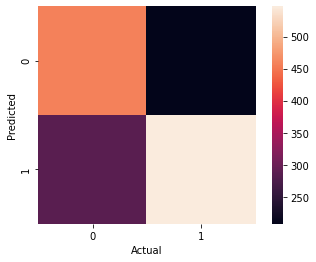

In [67]:
# Return Accuracy scores
print("Naive Bayes Model")
print("(Lowercase | max ngrams = 3 | news dataset included)")
print("----------------------------------------------------\n")
get_accuracy(nb_lower_3_news, 
             pred_lower_3_news, 
             y_test_lower_3_news, 
             X_lower_3_news, 
             y_lower_3_news)

Naive Bayes Model
(Max ngrams = 3 | news dataset included)
---------------------------------------

Accuracy Score: 
0.678

F1 Score: 
0.6745923228488606

Confusion Matrix: 
[[437 159]
 [324 580]]



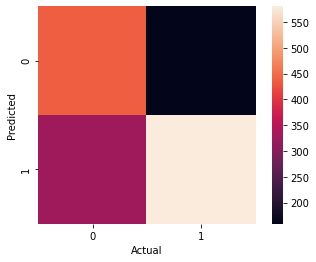

In [68]:
# Return Accuracy scores
print("Naive Bayes Model")
print("(Max ngrams = 3 | news dataset included)")
print("---------------------------------------\n")
get_accuracy(nb_all_3_news, 
             pred_all_3_news, 
             y_test_all_3_news, 
             X_all_3_news, 
             y_all_3_news)

Naive Bayes Model
(Max ngrams = 1 | news dataset included)
---------------------------------------

Accuracy Score: 
0.6886666666666666

F1 Score: 
0.6844564405438723

Confusion Matrix: 
[[443 131]
 [336 590]]



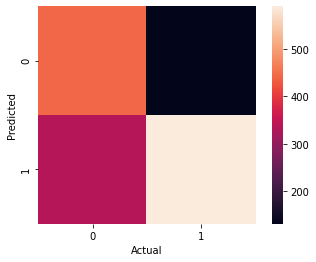

In [69]:
# Return Accuracy scores
print("Naive Bayes Model")
print("(Max ngrams = 1 | news dataset included)")
print("---------------------------------------\n")
get_accuracy(nb_all_1_news, 
             pred_all_1_news, 
             y_test_all_1_news, 
             X_all_1_news, 
             y_all_1_news)

Naive Bayes Model
(Max ngrams = 5 | news dataset included)
---------------------------------------

Accuracy Score: 
0.686

F1 Score: 
0.6844910954297326

Confusion Matrix: 
[[466 180]
 [291 563]]



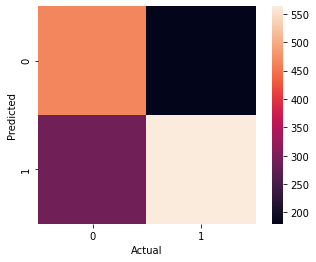

In [70]:
# Return Accuracy scores
print("Naive Bayes Model")
print("(Max ngrams = 5 | news dataset included)")
print("---------------------------------------\n")
get_accuracy(nb_all_5_news, 
             pred_all_5_news, 
             y_test_all_5_news, 
             X_all_5_news, 
             y_all_5_news)

# Support Vector Machines (Linear)

In [71]:
# Create SVM model 
svm = SVC(kernel = 'linear', C=1)

# Train SVM model for CV
svm.fit(X_train, y_train)

# Create prediction from SVM model
svm_pred = svm.predict(X_test)

NameError: ignored

In [39]:
# Initiate naive Support Vector Machines
svm_lower_3_news = SVC(kernel = 'linear', C=1)
svm_all_3_news = SVC(kernel = 'linear', C=1)
svm_all_1_news = SVC(kernel = 'linear', C=1)
svm_all_5_news = SVC(kernel = 'linear', C=1)
svm_all_3_nonews = SVC(kernel = 'linear', C=1)

# Train naive Bayes models
svm_lower_3_news.fit(X_train_lower_3_news, y_train_lower_3_news)
svm_all_3_news.fit(X_train_all_3_news, y_train_all_3_news)
svm_all_1_news.fit(X_train_all_1_news, y_train_all_1_news)
svm_all_5_news.fit(X_train_all_5_news, y_train_all_5_news)
svm_all_3_nonews.fit(X_train_all_3_nonews, y_train_all_3_nonews)

# Create prediction from
pred_lower_3_news = svm_lower_3_news.predict(X_test_lower_3_news)
pred_all_3_news = svm_all_3_news.predict(X_test_all_3_news)
pred_all_1_news = svm_all_1_news.predict(X_test_all_1_news)
pred_all_5_news = svm_all_5_news.predict(X_test_all_5_news)
pred_all_3_nonews = svm_all_3_nonews.predict(X_test_all_3_nonews)

SVM Model
---------

Accuracy Score: 
0.7013333333333334

F1 Score: 
0.698275444684739

Confusion Matrix: 
[[602 299]
 [149 450]]



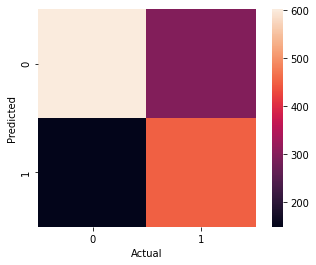

In [ ]:
# Return Accuracy scores 
print("SVM Model")
print("---------\n")
get_accuracy(svm_lower_3_news, pred_lower_3_news, y_test_lower_3_news, X_lower_3_news, y_lower_3_news)

SVM Model
---------

Accuracy Score: 
0.6933333333333334

F1 Score: 
0.6918000000000001

Confusion Matrix: 
[[570 286]
 [174 470]]



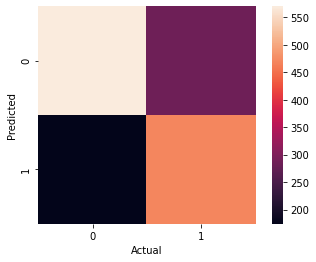

In [ ]:
# Return Accuracy scores 
print("SVM Model")
print("---------\n")
get_accuracy(svm_all_3_news, pred_all_3_news, y_test_all_3_news, X_all_3_news, y_all_3_news)

SVM Model
---------

Accuracy Score: 
0.7073333333333334

F1 Score: 
0.7062997327794726

Confusion Matrix: 
[[576 263]
 [176 485]]



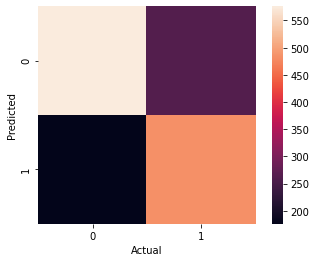

In [ ]:
# Return Accuracy scores 
print("SVM Model")
print("---------\n")
get_accuracy(svm_all_1_news, pred_all_1_news, y_test_all_1_news, X_all_1_news, y_all_1_news)

SVM Model
---------

Accuracy Score: 
0.7006666666666667

F1 Score: 
0.6999362021272191

Confusion Matrix: 
[[557 268]
 [181 494]]



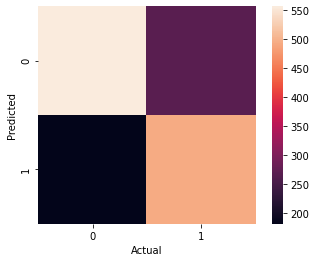

In [ ]:
# Return Accuracy scores 
print("SVM Model")
print("---------\n")
get_accuracy(svm_all_5_news, pred_all_5_news, y_test_all_5_news, X_all_5_news, y_all_5_news)

In [ ]:
# Return Accuracy scores 
print("SVM Model")
print("---------\n")
get_accuracy(svm_all_3_nonews, pred_all_3_nonews, y_test_all_3_nonews, X_all_3_nonews, y_all_3_nonews)

## cross validation scores for models including RandomForest, SVM, and NB (cv data)

In [ ]:
score1 =cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'),X, y,cv=5)
np.average(score1)

0.6774

In [ ]:
# Support Vector Classification cross validation
score2=cross_val_score(SVC(gamma='auto'), X, y,cv=5)
np.average(score2)

0.6066

In [ ]:
# Random Forest Classifier cross validation
score3=cross_val_score(RandomForestClassifier(n_estimators=40),X, y,cv=5)
np.average(score3)

0.6245999999999999

In [ ]:
# Naive Bayes - Multinomial cross validation
score8=cross_val_score(MultinomialNB(),X, y,cv=5)
np.average(score8)

0.6534000000000001

## Cross validation scores including RandomForest, SVM, and NB (TFIDF)

In [ ]:
#Tfid regression model
score4 =cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'),X2, y2,cv=5)
np.average(score4)

0.648

In [ ]:
#Tfid SVM
score5=cross_val_score(SVC(gamma='auto'), X2, y2,cv=5)
np.average(score5)

0.5012000000000001

In [ ]:
# Tfid RandomForest
score6=cross_val_score(RandomForestClassifier(n_estimators=40),X2, y2,cv=5)
np.average(score6)

0.6228

In [ ]:
# Tfid Naive Bayes
score7=cross_val_score(MultinomialNB(),X2, y2,cv=5)
np.average(score7)

0.6674

In [ ]:
# Save model and accuracy information for plotting model scores
model =['LogisticRegression_CV','SVM_CV', 'RandomForest_CV','NaiveBayes_CV','LogisticRegression_TF','SVM_TF', 'RandomForest_TF','NaiveBayes_TF']
accuracy =[np.average(score1),np.average(score2),np.average(score3),np.average(score8),np.average(score4),np.average(score5),np.average(score6),np.average(score7)]

C:\Users\Susan Rico\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  after removing the cwd from sys.path.


Text(0.5, 0, 'Models')

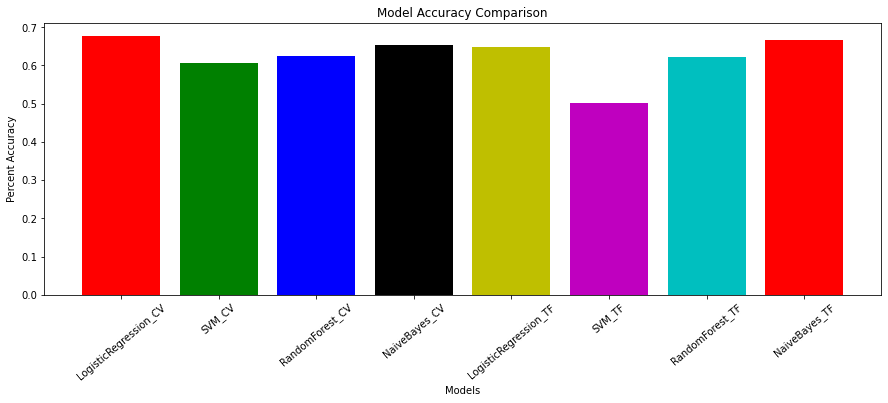

In [ ]:
# Plot scores
my_colors = 'rgbkymc' 
plt.figure(figsize=(15,5))
plt.bar(model, accuracy,color=my_colors)
plt.xticks(rotation=40)
plt.title("Model Accuracy Comparison")
plt.ylabel('Percent Accuracy')
plt.xlabel('Models')



# Top Feature

## Look at top features for Naive Bayes Model

In [72]:
# Save our features
features = np.array(cv_all_1_news.get_feature_names())

In [73]:
#Look at top features for the NAIVE BAYES model
non_sarcasm_coeffs = pd.DataFrame({'feature': features, 'coeff': nb_all_1_news .feature_log_prob_[0]})
sarcasm_coeffs = pd.DataFrame({'feature': features, 'coeff': nb_all_1_news .feature_log_prob_[1]})

In [74]:
# Look at top 50 features for both categories
# (Log probability, so very high probability corresponds to negative values closer to zero)
non_sarcasm_top = non_sarcasm_coeffs.sort_values('coeff').tail(50)
sarcasm_top = sarcasm_coeffs.sort_values('coeff').tail(50)



In [75]:
# Get top unique features by taking the symmetric difference 
top_unique = list(set(non_sarcasm_top['feature']).symmetric_difference(set(sarcasm_top['feature'])))



In [76]:
# Get the key features for each candidate by finding the top ones in the unique list
non_sarcasm_key_features = non_sarcasm_top[non_sarcasm_top.apply(lambda x: x['feature'] in top_unique, axis=1)].head(30)
non_sarcasm_key_features.reset_index(drop=True, inplace=True)

sarcasm_key_features = sarcasm_top[sarcasm_top.apply(lambda x: x['feature'] in top_unique, axis=1)].head(30)
sarcasm_key_features.reset_index(drop=True, inplace=True)




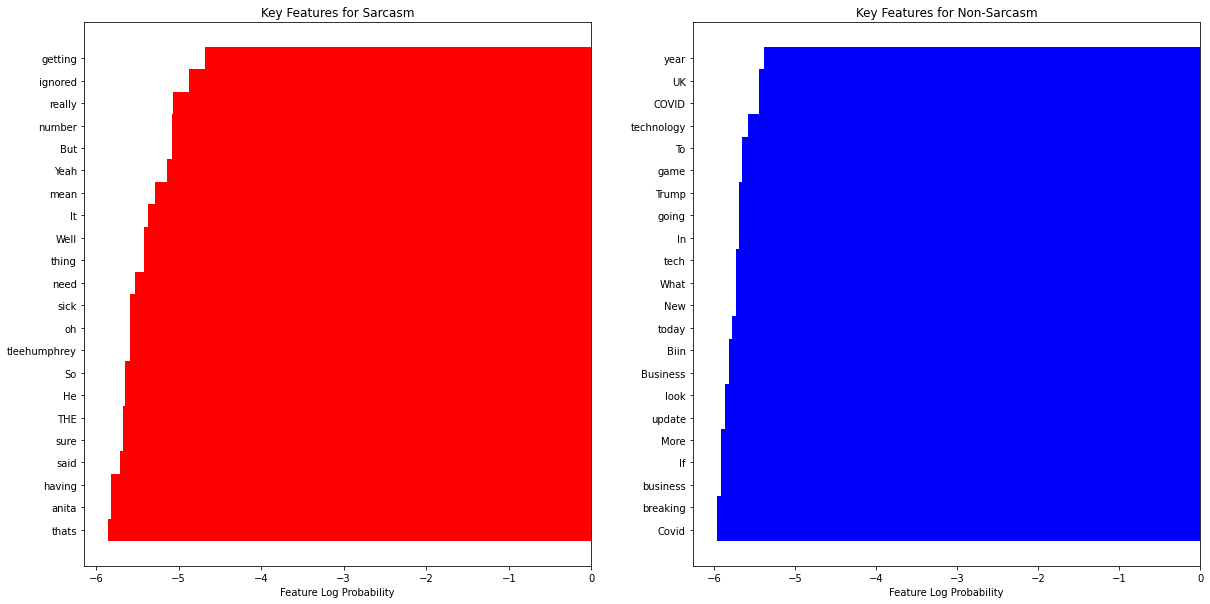

In [77]:
# Show these top features for each category along with their log probabilities
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[20,10])
axs[0].barh(sarcasm_key_features['feature'], width=sarcasm_key_features['coeff'], height=1, color='red')
axs[0].set_title('Key Features for Sarcasm')
axs[0].set_xlabel('Feature Log Probability')
axs[1].barh(non_sarcasm_key_features['feature'], width=non_sarcasm_key_features['coeff'], height=1, color='blue')
axs[1].set_title('Key Features for Non-Sarcasm')
axs[1].set_xlabel('Feature Log Probability')
plt.show()


## Top Feature for SVM Model

In [78]:
def plot_coefficients(MODEL=svm_all_1_news, COLNAMES=X_train.columns, top_features=10):
    ## Model if SVM MUST be SVC, RE: SVM_Model=LinearSVC(C=10)
    coef = svm_all_1_news.coef_.ravel()
    top_positive_coefficients = np.argsort(coef,axis=0)[-top_features:]
    print(top_positive_coefficients)
    top_negative_coefficients = np.argsort(coef,axis=0)[:top_features]
    print(top_negative_coefficients)
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[top_coefficients]]
    plt.bar(  x=  np.arange(2 * top_features)  , height=coef[top_coefficients], width=.5,  color=colors)
    feature_names = np.array(COLNAMES)
    plt.xticks(np.arange(0, (2*top_features)), feature_names[top_coefficients], rotation=60, ha="right")
    plt.show()
    

plot_coefficients()

NameError: ignored